In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
import warnings
warnings.filterwarnings("ignore")

p = matplotlib.rcParams
p["font.family"] = "Times New Roman" #"sans-serif"
# p["font.sans-serif"] = ["SimHei", "Tahoma"]
p["font.size"] = 200
p["axes.unicode_minus"] = False
p['lines.linewidth'] = 2
p['pdf.fonttype'] = 42
p['ps.fonttype'] = 42


In [2]:
p.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

# data cleaning

In [116]:
dataRaw = pd.read_csv(r"./2016CompleteRaw.csv", index_col=0)
dataRaw.head()
dataRaw = dataRaw.drop(["lon", "lat"], 1)
dataRaw.head()

,timestop,inout,crimsusp,arstmade,addrpct,sex,race,age,weight,haircolr,eyecolor,build,ht
0,60,0,4,0,41,M,B,48.0,180.0,BK,BR,T,74.0
1,30,0,32,0,10,M,W,20.0,150.0,BR,BR,T,68.0
2,30,1,16,1,66,M,P,34.0,140.0,BK,BR,M,66.0
3,40,0,16,0,47,M,B,33.0,180.0,BK,BR,M,69.0
4,50,0,15,0,79,M,B,22.0,160.0,BK,BL,T,71.0


In [117]:
dataRaw = dataRaw.replace(r'^\s*$', np.nan, regex=True).dropna()
dataRaw = dataRaw.replace('XX', np.nan).dropna()
dataRaw[['sex', 'build']] = dataRaw[['sex', 'build']].replace('Z', np.nan).dropna()
dataRaw['race'] = dataRaw['race'].replace('U', np.nan).dropna()
print (np.shape(dataRaw))
print (dataRaw['sex'].value_counts())
print (dataRaw['race'].value_counts())
print (dataRaw['haircolr'].value_counts())
print (dataRaw['eyecolor'].value_counts())
print (dataRaw['build'].value_counts())
dataRaw.describe()

(12086, 13)
M    10995
F      856
Name: sex, dtype: int64
B    6348
Q    2681
W    1216
P     853
A     729
Z     134
I      37
Name: race, dtype: int64
BK    8970
BR    2294
BA     387
BL     136
GY     124
SP      74
ZZ      58
RA      37
DY       4
SN       2
Name: haircolr, dtype: int64
BR    10665
BK      936
BL      203
HA      111
GR      102
Z        54
GY       14
DF        1
Name: eyecolor, dtype: int64
M    5312
T    5243
H    1167
U     129
Name: build, dtype: int64


,timestop,inout,crimsusp,arstmade,addrpct,age,weight,ht
count,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000,12086.000000
mean,814.381599,0.194854,21.091511,0.215456,68.969055,28.134619,169.409399,68.709168
std,461.509783,0.396104,10.624259,0.411155,34.101307,11.714088,39.443510,3.435760
min,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,36.000000
25%,345.000000,0.000000,16.000000,0.000000,42.000000,19.000000,150.000000,67.000000
50%,935.000000,0.000000,16.000000,0.000000,70.000000,25.000000,165.000000,69.000000
75%,1213.000000,0.000000,32.000000,0.000000,106.000000,34.000000,185.000000,71.000000
max,1439.000000,1.000000,58.000000,1.000000,123.000000,99.000000,999.000000,83.000000


In [118]:
def filterOutPercentile(dataRaw, col, perc):
    LB = np.percentile(dataRaw[col], perc)
    UB = np.percentile(dataRaw[col], 100-perc)
    dataRaw = dataRaw[(dataRaw[col] >= LB) & (dataRaw[col] < UB)]
    print (np.shape(dataRaw))
    return dataRaw

dataRaw = filterOutPercentile(dataRaw, 'age', .3)
dataRaw = filterOutPercentile(dataRaw, 'ht', .5)
dataRaw = filterOutPercentile(dataRaw, 'weight', 5)
print (dataRaw['sex'].value_counts())
print (dataRaw['race'].value_counts())
print (dataRaw['haircolr'].value_counts())
print (dataRaw['eyecolor'].value_counts())
print (dataRaw['build'].value_counts())
dataRaw.describe()

(12009, 13)
(11876, 13)
(10942, 13)
M    10047
F      692
Name: sex, dtype: int64
B    5713
Q    2452
W    1098
P     776
A     674
Z     118
I      36
Name: race, dtype: int64
BK    8169
BR    2094
BA     323
BL     122
GY      99
SP      61
ZZ      38
RA      32
SN       2
DY       2
Name: haircolr, dtype: int64
BR    9679
BK     844
BL     181
HA      97
GR      90
Z       38
GY      12
DF       1
Name: eyecolor, dtype: int64
M    5047
T    4894
H     692
U     106
Name: build, dtype: int64


,timestop,inout,crimsusp,arstmade,addrpct,age,weight,ht
count,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000,10942.000000
mean,814.856333,0.193932,21.126576,0.214769,69.167245,27.906050,166.170718,68.718881
std,463.015055,0.395394,10.621754,0.410681,34.042646,11.184608,23.110712,2.997596
min,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,120.000000,60.000000
25%,340.000000,0.000000,16.000000,0.000000,42.000000,19.000000,150.000000,67.000000
50%,935.000000,0.000000,16.000000,0.000000,70.000000,25.000000,165.000000,69.000000
75%,1215.000000,0.000000,32.000000,0.000000,106.000000,34.000000,180.000000,71.000000
max,1439.000000,1.000000,58.000000,1.000000,123.000000,66.000000,224.000000,76.000000


In [119]:
dataClean = dataRaw.copy()
#dataClean.to_csv(r".\2016CompleteClean.csv")
print (dataClean['arstmade'].mean())
dataClean.columns

0.21476878084445256


Index(['timestop', 'inout', 'crimsusp', 'arstmade', 'addrpct', 'sex', 'race',
       'age', 'weight', 'haircolr', 'eyecolor', 'build', 'ht'],
      dtype='object')

# heat map

In [120]:
import scipy.stats as stats
cats = ['arstmade', 'inout', 'crimsusp',
        'addrpct', 'sex', 'race',
        'haircolr', 'eyecolor', 'build']
conts = ['arstmade', 'age', 'weight', 'ht']

def getGenCorr(a, b):
    if a == b:
        return 1
    if (a in conts and b in conts):
        return dataClean.loc[:, [a, b]].corr().iloc[0, 1]
    data = dataClean.loc[:, [a, b]].groupby([a, b]).size().reset_index()
    #print (data)
    data = data.pivot_table(index=a, values=0, columns=b).fillna(0)
    #print (data, np.shape(data))
    chi2 = stats.chi2_contingency(data)[0]
    den = min(np.shape(data))-1
    return np.sqrt((chi2/len(dataClean))/den)

In [121]:
corrs = pd.DataFrame(index=cats, columns=cats)
for a in cats+['age', 'weight', 'ht']:
    for b in cats+['age', 'weight', 'ht']:
        corrs.loc[a, b] = getGenCorr(a, b)
#corrs.index.name = 'feature'
#corrs.columns.name = 'feature'
corrs = corrs.astype('float32')
corrs

,arstmade,inout,crimsusp,addrpct,sex,race,haircolr,eyecolor,build,age,weight,ht
arstmade,1.000000,0.197996,0.281114,0.276006,0.019795,0.068200,0.051242,0.062505,0.012256,0.033266,-0.030953,-0.017772
inout,0.197996,1.000000,0.351089,0.351660,0.083007,0.062742,0.058792,0.047351,0.016974,0.109287,0.108750,0.058931
crimsusp,0.281114,0.351089,1.000000,0.164647,0.131089,0.129758,0.084227,0.084933,0.085486,0.084186,0.172865,0.077185
addrpct,0.276006,0.351660,0.164647,1.000000,0.108515,0.290984,0.112555,0.114683,0.114847,0.095571,0.093208,0.097020
sex,0.019795,0.083007,0.131089,0.108515,1.000000,0.037416,0.144770,0.031686,0.068514,0.077365,0.295411,0.375842
race,0.068200,0.062742,0.129758,0.290984,0.037416,1.000000,0.152340,0.150597,0.043068,0.099130,0.075586,0.096232
haircolr,0.051242,0.058792,0.084227,0.112555,0.144770,0.152340,1.000000,0.150617,0.037868,0.173147,0.108733,0.045144
eyecolor,0.062505,0.047351,0.084933,0.114683,0.031686,0.150597,0.150617,1.000000,0.029715,0.075070,0.089089,0.040657
build,0.012256,0.016974,0.085486,0.114847,0.068514,0.043068,0.037868,0.029715,1.000000,0.134932,0.337268,0.057634
age,0.033266,0.109287,0.084186,0.095571,0.077365,0.099130,0.173147,0.075070,0.134932,1.000000,0.272233,0.056963


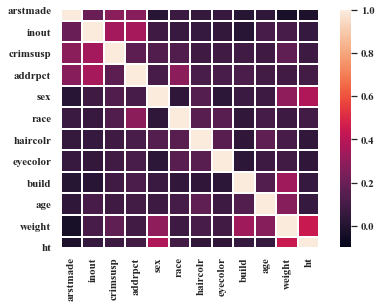

In [123]:
import seaborn as sns


pdf = PdfPages('Figure_hm.pdf')
figure, ax = plt.subplots(figsize=(12,12*0.8))
figure.tight_layout()
sns.heatmap(corrs, vmin=-0.1, vmax=1, linewidths=1, square=True, ax=ax)
ax.set_yticklabels(labels=corrs.index, rotation=0)
ax.set_xticklabels(labels=corrs.columns, rotation=90)
#pdf.savefig(figure,bbox_inches='tight',dpi=figure.dpi,pad_inches=0.0)
pdf.close()

# feature engineering

In [124]:
dataClean.head()

,timestop,inout,crimsusp,arstmade,addrpct,sex,race,age,weight,haircolr,eyecolor,build,ht
0,60,0,4,0,41,M,B,48.0,180.0,BK,BR,T,74.0
1,30,0,32,0,10,M,W,20.0,150.0,BR,BR,T,68.0
2,30,1,16,1,66,M,P,34.0,140.0,BK,BR,M,66.0
3,40,0,16,0,47,M,B,33.0,180.0,BK,BR,M,69.0
4,50,0,15,0,79,M,B,22.0,160.0,BK,BL,T,71.0


In [125]:
#one hot
crimsusp = pd.get_dummies(dataClean['crimsusp'], prefix='crimSus')
addrpct = pd.get_dummies(dataClean['addrpct'], prefix='prect')
sex = pd.get_dummies(dataClean['sex'], prefix='sex').iloc[:, [0]]
race = pd.get_dummies(dataClean['race'], prefix='race')
haircolor = pd.get_dummies(dataClean['haircolr'], prefix='hc')
eyecolor = pd.get_dummies(dataClean['eyecolor'], prefix='ec')
build = pd.get_dummies(dataClean['build'], prefix='build')

data2 = dataClean.iloc[:, [0, 1, 7, 8, 12]]
data2 = data2.join([crimsusp, addrpct, sex, race, haircolor, eyecolor, build], how='left')
data2 = data2.join(dataClean['arstmade'], how='left')
print (np.shape(data2))

(10942, 167)


In [143]:
#suspect features, time, location only
data1 = dataClean.iloc[:, [0, 7, 8, 12]]
data1 = data1.join([dataClean['arstmade'], addrpct, sex, race, haircolor, eyecolor, build], how='left')
data1.head()

,timestop,age,weight,ht,arstmade,prect_1,prect_5,prect_6,prect_7,prect_9,...,ec_BR,ec_DF,ec_GR,ec_GY,ec_HA,ec_Z,build_H,build_M,build_T,build_U
0,60,48.0,180.0,74.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,30,20.0,150.0,68.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,30,34.0,140.0,66.0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,40,33.0,180.0,69.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,50,22.0,160.0,71.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [191]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

def splitData(data):
    X = data.drop(['arstmade'], 1)
    y = data['arstmade']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    print (np.shape(X_train), np.shape(y_train), np.shape(X_test), np.shape(y_test))
    return X_train, X_test, y_train, y_test

def trainModel(Xtr, ytr, penalty='none'):
    clf = LogisticRegression(fit_intercept=True,
                             penalty=penalty, # no regularization, l1, l2, elasticnet
                             random_state=0,
                             solver='lbfgs',
                             multi_class='ovr',
                             class_weight='none',
                             max_iter=100,
                            )
    clf.fit(Xtr, ytr)
    print ("train score = %.5f" % (clf.score(Xtr, ytr)))
    return clf

def confMat(Xte, yte, clf):
    ypr = clf.predict(Xte)
    confMat = confusion_matrix(yte, ypr)
    recall = round((confMat[0, 0]/sum(confMat[:, 0]))*100, 2)
    precision = round((confMat[0, 0]/sum(confMat[0, :]))*100, 2)
    accuracy = round(((confMat[0, 0]+confMat[1, 1])/(confMat.sum(0).sum()))*100, 2)
    f1 = 2*recall*precision/(100*(recall+precision))
    print ("recall(sensi) = %.2f %%" % recall)
    print ("precision = %.2f %%" % (precision))
    print ("accuracy = %.2f %%" % (accuracy))
    print ("f1 score = %.3f" % (f1))
    return confMat

def roc(Xte, yte, clf, fign):
    pdf = PdfPages('.\%s.pdf'%(fign))
    ypr = clf.predict_proba(Xte)[:, 1]
    fpr, tpr, thresh = roc_curve(yte, ypr)
    f, ax = plt.subplots(figsize=(6, 4))
    ax.plot(fpr, tpr, label='roc curve')
    ax.plot([0, 1], [0, 1], label='benchmark')
    ax.set_xlabel("fpr")
    ax.set_ylabel("tpr")
    ax.legend(loc='upper left')
    #ax.text(.6, .4, 'auc = %.3f'%(auc(fpr, tpr)), fontsize=15)
    print ("auc = ", auc(fpr, tpr))
    pdf.savefig(f,bbox_inches='tight',dpi=figure.dpi,pad_inches=0.0)
    pdf.close()
    
    
def test(Xte, yte, clf):
    print ("test score = %.5f" % clf.score(Xte, yte))

(8753, 111) (8753,) (2189, 111) (2189,)
train score = 0.79013
auc =  0.6653088934147997
recall(sensi) = 78.17 %
precision = 99.35 %
accuracy = 77.98 %
f1 score = 0.875


array([[1687,   11],
       [ 471,   20]], dtype=int64)

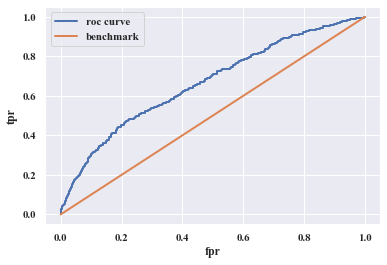

In [188]:
X_train, X_test, y_train, y_test = splitData(data1)
clf = trainModel(X_train, y_train, penalty='none')
#test(X_test, y_test, clf)
roc(X_test, y_test, clf, 'data1roc')
confMat(X_test, y_test, clf)

(8753, 166) (8753,) (2189, 166) (2189,)
train score = 0.80887
auc =  0.6897188257900154
recall(sensi) = 80.00 %
precision = 98.23 %
accuracy = 79.58 %
f1 score = 0.882


array([[1668,   30],
       [ 417,   74]], dtype=int64)

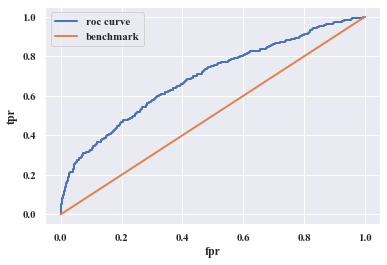

In [193]:
X_train, X_test, y_train, y_test = splitData(data2)
clf = trainModel(X_train, y_train, 'l2')
roc(X_test, y_test, clf, 'data2roc')
confMat(X_test, y_test, clf)

In [ ]:
pd.DataFrame(data2.corr()).iloc[-1].to_excel(r".\corr.xlsx")

## unblanced data

1. resampling
2. collecting more data
3. use different models

In [ ]:
data3 = data2.copy()
data3Arr = data3[data3['arstmade']==1]
data3Arr.index = range(max(data3.index)+1, max(data3.index)+1+len(data3Arr))
data3RsArr = data3.append([data3Arr])

In [ ]:
X_train, X_test, y_train, y_test = splitData(data3RsArr)
clf = trainModel(X_train, y_train, 'l2')
test(X_test, y_test, clf)
confMat(X_test, y_test, clf)
roc(X_test, y_test, clf)